# 1. Google Drive Mount

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 2. Data Load
- gdrive에서 데이터 불러오기
- 데이터 개수 파악하기

In [0]:
import pandas as pd
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

train = pd.read_csv("/content/gdrive/My Drive/Samsung_SDS_S2/Random Forest/train.csv")
test = pd.read_csv("/content/gdrive/My Drive/Samsung_SDS_S2/Random Forest/test.csv")

print(train)

                                title  ...                                               plot
0                   This Land Is Mine  ...  Albert is an unmarried schoolmaster living wit...
1                     Head Over Heels  ...  Charles Richardson is a civil servant in his e...
2                 Twice in a Lifetime  ...  Harry Mackenzie works in a factory by day, and...
3                                Next  ...  Cris Johnson (Nicolas Cage) can see into his f...
4                       Desert Nights  ...  A gang of thieves rob an African diamond compa...
5                                 Oy!  ...  Uday (Siddharth), is a rich kid who becomes ch...
6               The Missouri Traveler  ...  Brandon deWilde leads a cast lengthy in charac...
7                                Bang  ...  Bang is a story about an unnamed young woman l...
8                              Gifted  ...  In a small town near Tampa, Florida, seven-yea...
9              Phantom of the Theatre  ...  A haunted theatr

In [0]:
import numpy as np

a = train["genre"].to_list()
index, count = np.unique(a, return_counts=True)
print(index)
print(count)

b = test["genre"].to_list()
index, count = np.unique(b, return_counts=True)
print(index)
print(count)

['comedy' 'drama' 'science fiction' 'thriller' 'war']
[3919 5384  382  881  234]
['comedy', 'drama', 'comedy', 'drama', 'comedy', 'drama', 'drama', 'comedy', 'drama', 'comedy', 'science fiction', 'drama', 'comedy', 'comedy', 'thriller', 'drama', 'drama', 'comedy', 'comedy', 'comedy', 'drama', 'comedy', 'drama', 'thriller', 'war', 'drama', 'thriller', 'comedy', 'science fiction', 'science fiction', 'drama', 'science fiction', 'drama', 'drama', 'drama', 'drama', 'drama', 'drama', 'thriller', 'drama', 'drama', 'science fiction', 'comedy', 'drama', 'comedy', 'science fiction', 'comedy', 'drama', 'comedy', 'comedy', 'drama', 'drama', 'thriller', 'drama', 'drama', 'war', 'comedy', 'drama', 'comedy', 'drama', 'thriller', 'comedy', 'thriller', 'war', 'drama', 'comedy', 'drama', 'drama', 'drama', 'drama', 'comedy', 'drama', 'drama', 'drama', 'drama', 'comedy', 'comedy', 'drama', 'comedy', 'thriller', 'drama', 'drama', 'comedy', 'drama', 'comedy', 'comedy', 'thriller', 'comedy', 'drama', 'drama'

# 3. Data Analysis

[1 1 1 ... 3 1 0]


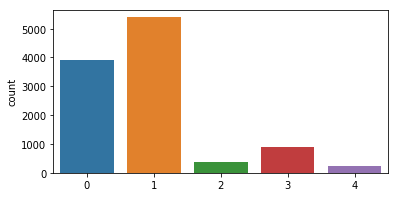

In [0]:
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

le = preprocessing.LabelEncoder()
genre_num = le.fit_transform(train["genre"])
print(genre_num)

fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6,3)
sns.countplot(genre_num)

In [0]:
import numpy as np

train_length = train["plot"].apply(len)

print('시나리오 길이 최대값: {}'.format(np.max(train_length)))
print('시나리오 길이 평균값: {}'.format(np.mean(train_length)))
print('시나리오 길이 표준편차: {}'.format(np.std(train_length)))
print('시나리오 길이 중간값: {}'.format(np.median(train_length)))
print('시나리오 길이 제1사분위: {}'.format(np.percentile(train_length, 25)))
print('시나리오 길이 제3사분위: {}'.format(np.percentile(train_length, 75)))

시나리오 길이 최대값: 29442
시나리오 길이 평균값: 2070.448148148148
시나리오 길이 표준편차: 1723.7387255550195
시나리오 길이 중간값: 1588.0
시나리오 길이 제1사분위: 672.0
시나리오 길이 제3사분위: 3223.25


(-0.5, 799.5, 599.5, -0.5)

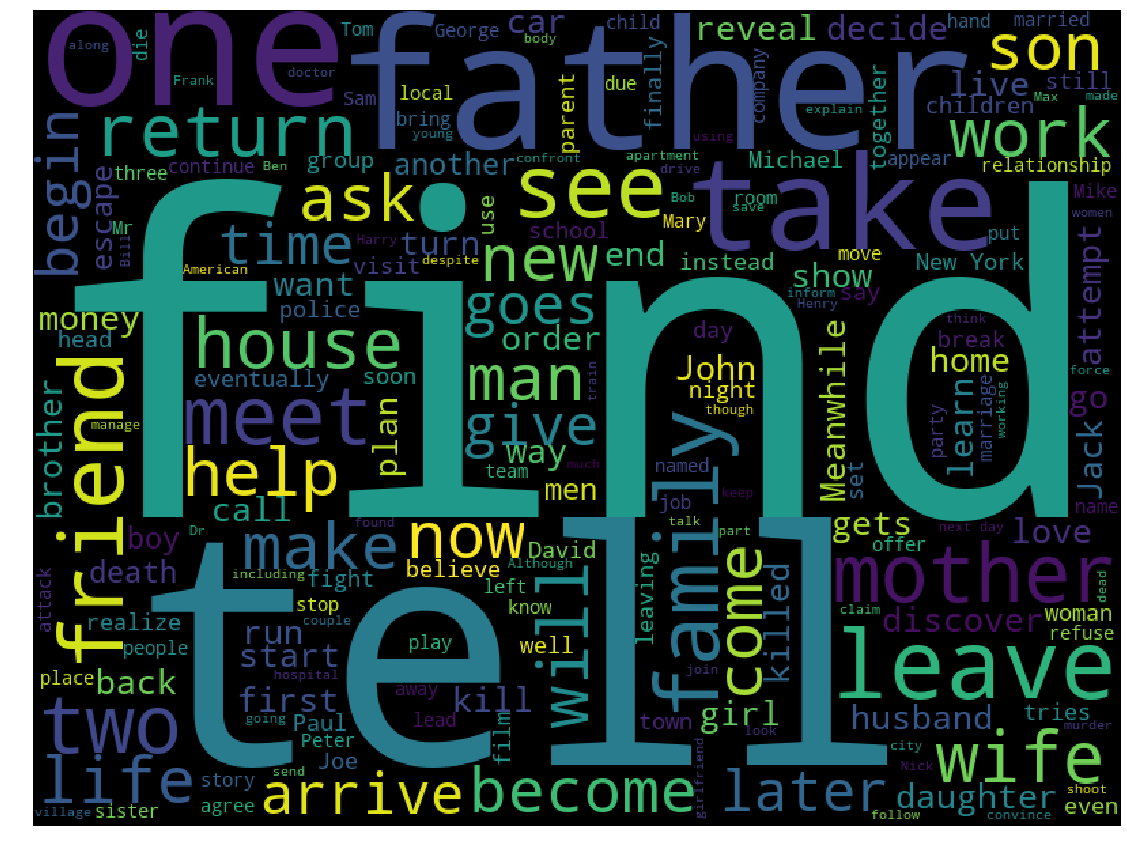

In [0]:
cloud = WordCloud(width=800, height=600).generate(" ".join(train["plot"].astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0, 0.5, 'Probability')

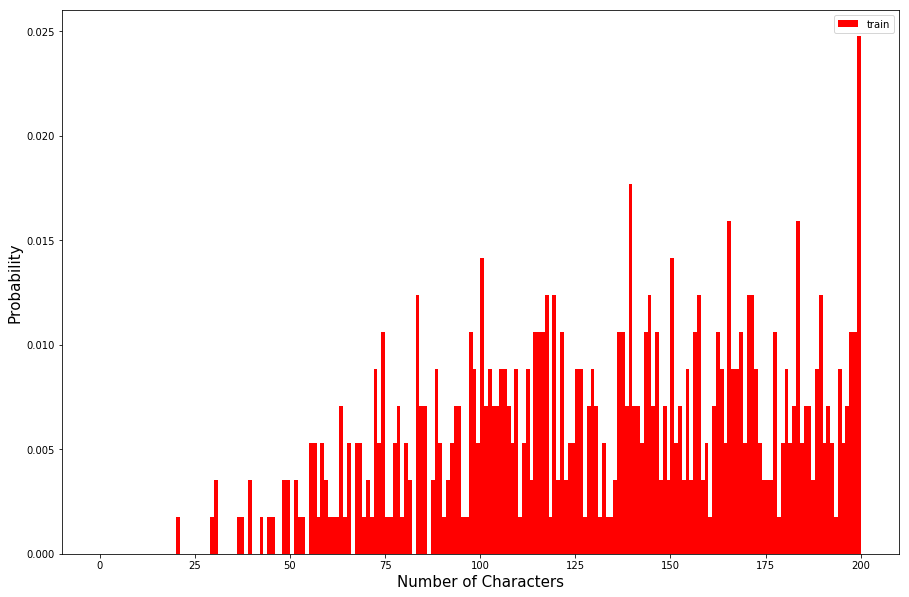

In [0]:
train_length = train["plot"].apply(len)

plt.figure(figsize=(15,10))
plt.hist(train_length, bins=200, range=[0, 200], facecolor='r', normed=True, label='train')
plt.legend()
plt.xlabel('Number of Characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

# 4. Text to Representation
- sklearn의 CountVector 사용해서 텍스트 Vector로 변환시키기

In [0]:
plot_list = train["plot"].to_list()

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(plot_list)
Y = train["genre"].tolist()

print(X.shape)

(10800, 72724)


# 5. Make Model

In [0]:
# from sklearn.naive_bayes import MultinomialNB
# clf = MultinomialNB()
# clf.fit(X, Y)

# from sklearn.svm import SVC
# clf = SVC(gamma='auto')
# clf.fit(X, Y)

clf = RandomForestClassifier()
clf.fit(X, Y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# 6. Evaluation
-  SKlearn 사용해서 평가진행

In [0]:
test_review = test["plot"].tolist()

pred_list = []
for i in range(0, len(test)):
  pred_label = clf.predict(vectorizer.transform([test_review[i]]))
  pred_list.append(pred_label[0])

In [0]:
from sklearn.metrics import classification_report
print(pred_list)
print(test["genre"].to_list())
print(classification_report(test["genre"].to_list(), pred_list))

['comedy', 'war', 'comedy', 'drama', 'comedy', 'drama', 'drama', 'comedy', 'drama', 'comedy', 'drama', 'drama', 'drama', 'comedy', 'drama', 'drama', 'drama', 'drama', 'comedy', 'comedy', 'drama', 'comedy', 'drama', 'comedy', 'drama', 'drama', 'drama', 'comedy', 'drama', 'science fiction', 'drama', 'science fiction', 'drama', 'drama', 'drama', 'comedy', 'drama', 'drama', 'drama', 'comedy', 'drama', 'science fiction', 'comedy', 'drama', 'drama', 'drama', 'comedy', 'drama', 'comedy', 'drama', 'comedy', 'drama', 'thriller', 'drama', 'drama', 'war', 'comedy', 'drama', 'drama', 'drama', 'drama', 'drama', 'drama', 'drama', 'drama', 'drama', 'drama', 'drama', 'drama', 'drama', 'drama', 'drama', 'drama', 'drama', 'drama', 'comedy', 'drama', 'drama', 'comedy', 'drama', 'comedy', 'drama', 'comedy', 'drama', 'drama', 'comedy', 'drama', 'drama', 'comedy', 'drama', 'comedy', 'comedy', 'drama', 'comedy', 'comedy', 'drama', 'drama', 'drama', 'comedy', 'comedy', 'drama', 'drama', 'drama', 'comedy', 'co